# DSCI 100 Project Final Report: Predicting Hours Contribution To “Players” Dataset From UBC Minecraft Players Based On Experience Level, Age, & Gender.

**Section:** 100-002. <br>
**Group Number:** 39. <br>
**Members:** <br>
Kevin Liu (91073668). <br>
Sophie Schlatter (77753598). <br>
Robbie Suganob (18247866). <br>
Adrian Tang (56996051).

***

## **PART 1: INTRODUCTION:**

### Background:

Understanding player engagement is a critical aspect of game research, influencing game design, resource allocation, and targeted player recruitment, which has led to increased interest in analyzing player activity data. A research group in the Computer Science department at the University of British Columbia (UBC), led by Frank Wood, is investigating how players interact with video games by collecting their in-game behavioural data.

For their study, the research team has set up a Minecraft server, where players' in-game actions are recorded as they navigate through the virtual world. The data collected provides an understanding of how different types of players engage with the game. However, not all players contribute equally. Some engage with the game significantly more than others, and running such a project efficiently requires targeted recruitment strategies to attract the players who will contribute more data. By identifying player characteristics that correlate with high levels of engagement, the research team can focus their recruitment efforts on individuals who are most likely to produce relevant and necessary data.

### Research Question:

This report aims to answer the following question:

**"Can certain experience levels, ages, and genders predict the total number of hours a player contributes to the players dataset?"**

By analyzing how each of these player characteristics relate to total playtime, we can determine which groups of players are most engaged and therefore contribute the most data. These findings will help the research team refine recruitment strategies and allocate their resources more efficiently.

### Dataset Analysis:

To answer this question, we used two datasets: <br>
**`players.csv`** &mdash; Contains general demographic and experience-related information about players. <br>
**`sessions.csv`** &mdash; The logs of individual game sessions.

***
The descriptive summary of the variables in the **`players.csv`** dataset: <br>
<br> - Number of observations: **196** (indicates 196 unique users/players).
<br> - Number of variables: **7** (listed below).
| Variable | Type | Description |
| --- | --- | --- | 
| `experience`| categorical (chr) | Refers to the player's experience level (amateur, regular, veteran, pro). |
| `subscribe` | logical (lgl) | Whether the player is a subscriber to the game-related newsletter. |
| `hashedEmail` | categorical (chr) | A hashed (encrypted) version of a player's email that acts as an anonymized identifier for the player; this is done to avoid using their actual email addresses and thus protect their privacy. |
| `played_hours` | numerical (dbl) | Total hours played by the player. |
| `name` | categorical (chr) | Player's name. |
| `gender` | categorical (chr) | Gender of the player. | 
| `Age` | numerical (dbl) | Player's age. |


Other notes for the **`players.csv`** dataset:
<br> - Some variables such as `gender` and `experience` may not be evenly distributed, which may introduce biases to predictions.
<br> - `played_hours` could have outliers; some players are observed to have extreme values. This could potentially skew the averages and impact the modeling.

***
The descriptive summary of the variables in the **`sessions.csv`** dataset: <br>
<br> - Number of observations: **1535** (indicates 1535 recorded sessions).
<br> - Number of variables: **5** (listed below)
| Variable | Type | Description |
| --- | --- | --- | 
| `hashedEmail`| categorical (chr) | Anonymized player identifier, matches the **`players.csv`** dataset. |
| `start_time` | categorical (chr) | Date and time for the start of player's session. |
| `end_time` | categorical (chr) | Date and time for the end of player's session. |
| `original_start_time` | numerical (dbl) | A timestamp version of `start_time`. |
| `original_end_time` | numerical (dbl) | A timestamp version of `end_time`. |

Other notes for the **`sessions.csv`** dataset:
<br> - There are significantly more session observations than player observations, indicating that some players has multiple sessions.

***

## **PART 2: METHODS & RESULTS:**

Here, we will load the necessary libraries and data, assigning **`players.csv`** and **`sessions.csv`** to objects **players** and **sessions** respectively:

In [52]:
library(ggplot2)
library(repr)
library(tidymodels)
library(tidyverse)

In [5]:
players <- read.csv("https://raw.githubusercontent.com/frogbie/dsci100project-002-39/refs/heads/main/players.csv")
head(players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [6]:
sessions<- read.csv("https://raw.githubusercontent.com/frogbie/dsci100project-002-39/refs/heads/main/sessions.csv")
head(sessions)

,hashedEmail,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Data Wrangling & Cleaning:

***

In terms of data wrangling, we will match the **players** and **sessions** dataset using the `hashedEmail` variable, which exists in both datasets. We then will aggregate the total number of sessions per player in a new variable `(total_sessions)`, and also calculate the average session duration per player. Using the `mutate` function, we can create a new variable: `avg_session_length`, which would be computed by played_hours / total_sessions. By doing this, we will be able to compare the `played_hours` and `avg_session_length` variables against `experience`, `age`, and `gender` to determine which characteristics are the strongest predictors of the amount of data a player contributes.


In order to accomplish this, we need to perform the following: <br>
- Store our `players` data frame in the `tidy_players` variable. <br>
- Store our `sessions` data frame in the `tidy_sessions` variable, while also removing redundant data from the sessions dataset. <br>
- Find the mean value for each quantitative variable in the `players.csv` dataset. 

**Wrangling of `players` dataset:** <br>
- The data is mostly tidy, but we have arranged the experience column by experience level for the sake of organization.

In [7]:
tidy_players <- players |>
    mutate(experience = factor(experience, levels = c("Amateur", "Beginner", "Regular", "Veteran", "Pro"))) |>
    arrange(experience)

head(tidy_players)
tail(tidy_players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
2,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
3,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
4,Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
5,Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
6,Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22


,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
191,Pro,TRUE,f4f29f2465743ead8c3ce02fc84542afe33ae3c95ef56a42b8f7785550fe9e4a,0.6,Arlo,Male,19
192,Pro,FALSE,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.4,Lyra,Male,21
193,Pro,FALSE,e1e5b1d36ab7680b6927fd3cb619c2b5373167750f90f7a21bf67b5d9b0fd73f,0.0,Jesse,Non-binary,17
194,Pro,FALSE,f7875ae87a61632030d5c4029ee8cf081be7047b2b4a9c04ab5a706f59786197,0.2,Liam,Male,17
195,Pro,FALSE,d46bd29a2ed08e3500bd8729085ef4b6f0ca65baf4c756f88b6bedf7a18e0352,1.7,Asher,Male,17
196,Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**Wrangling of the `sessions` data set:** <br>
Again, the data is mostly tidy in regards to what we require for this project. Although there are multiple repetitions in the `hashedEmail` column, each row represents a different observation (unique session). Removing the `original_start_time` and `original_end_time` columns allows us to avoid redundancy; we only need `start_time` and `end_time` to calculate the total session time. We will also convert the variables to POSIXct format (dttm) from character format to simplify calculations.

In [8]:
tidy_sessions <- sessions |>
    select(-original_start_time, -original_end_time) |>
    mutate(start_time = as.POSIXct(start_time, format="%d/%m/%Y %H:%M", tz="PTC")) |>
    mutate(end_time = as.POSIXct(end_time, format="%d/%m/%Y %H:%M", tz="PTC"))

head(tidy_sessions)

,hashedEmail,start_time,end_time
,<chr>,<dttm>,<dttm>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00


**Mean value for each quantitative variable in the `players.csv` dataset:** <br>
- Calculating the mean for each quantitative variable (age and played hours) can offer valuable insight for data analysis. For example, the mean age can help identify the age range where players are most active and would therefore contribute significant data. Similarly, the observed mean for played hours may serve as a benchmark for what we would define as significant contributors (i.e. we can determine if a certain characteristic is generally associated with higher playtime than the mean).

In [9]:
players_means <- players |>
    summarise(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))

players_means

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


## Dataset Visualisations:

### 1. Experience Level vs. Played Hours:

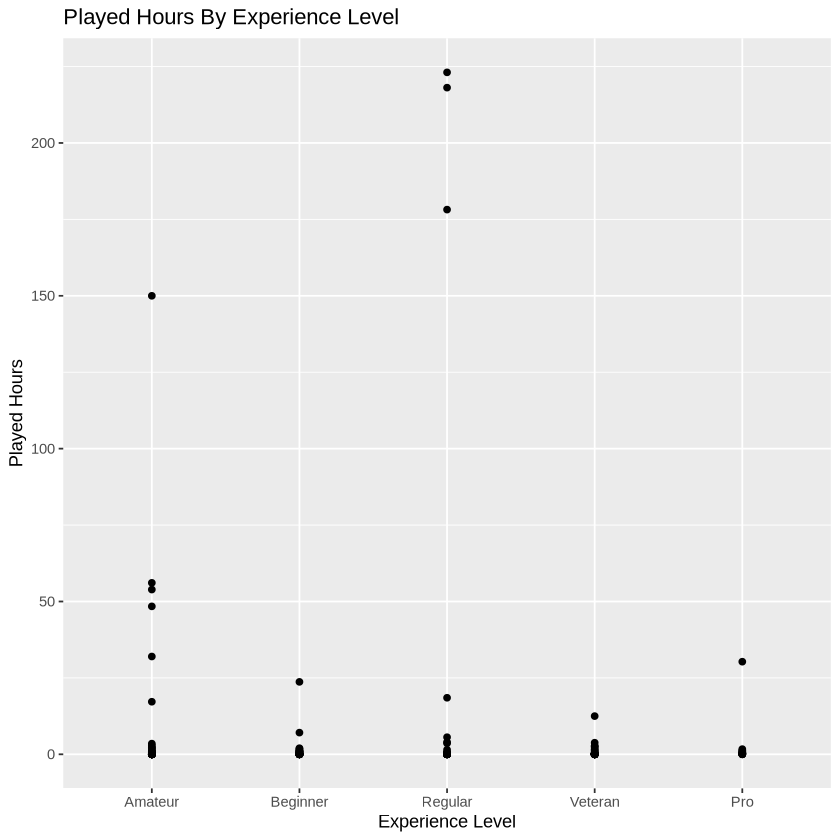

In [37]:
experience_plot1 <- tidy_players |>
    ggplot(aes(x = experience, y = played_hours)) +
    geom_point() +
    labs(title = "Played Hours By Experience Level", x = "Experience Level", y = "Played Hours")

experience_plot1

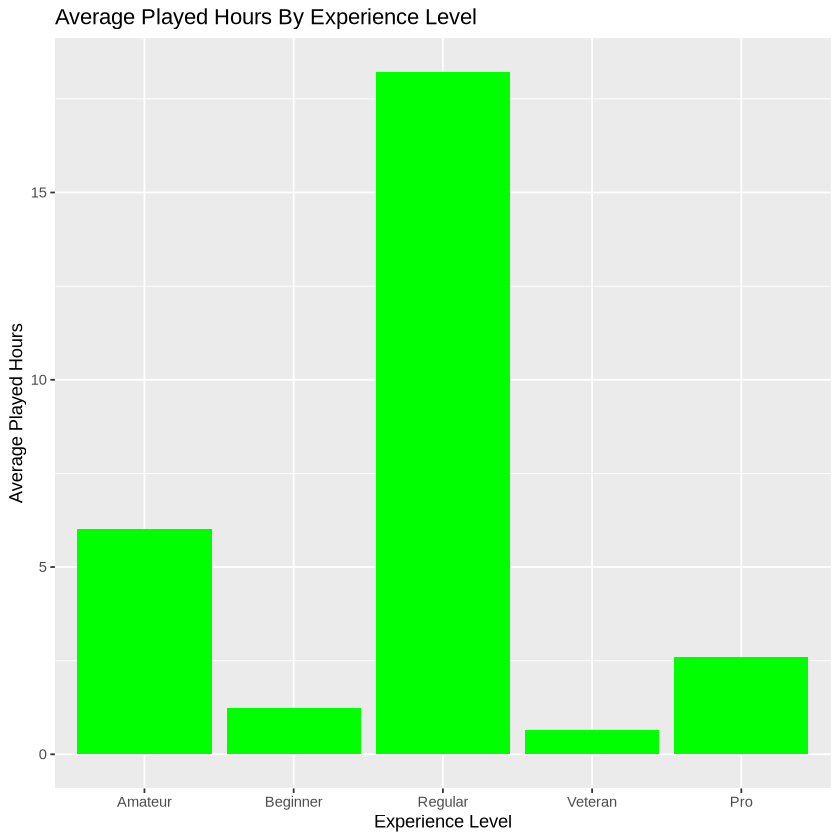

In [21]:
experience_means <- tidy_players |>
    group_by(experience) |>
    summarise(mean_hours = mean(played_hours, na.rm = TRUE))

experience_plot2 <- experience_means |>
    ggplot(aes(x = experience, y = mean_hours)) + 
    geom_col(fill = "green") +
    labs(title = "Average Played Hours By Experience Level", x = "Experience Level", y = "Average Played Hours")

experience_plot2

From the two visualizations above we can see that amateurs have the highest amounts of played hours overall. It may seem like regulars have the most playing time, which inuitively makes sense, however because of outliers in the data we can't say with complete certainty that it's true. Veteran's and Beginners had the least amount of playing time.

### 2. Age vs. Played Hours

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


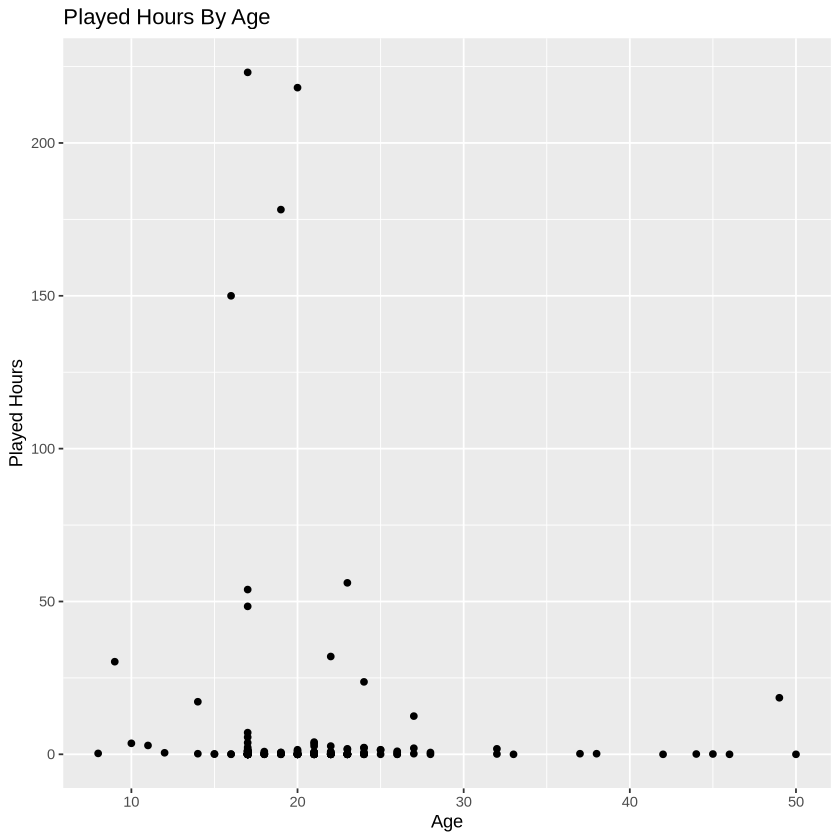

In [40]:
age_plot <- tidy_players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(title = "Played Hours By Age", x = "Age", y = "Played Hours")

age_plot

From the graph above we can conclude that in general, players aged from around 15-30 contribute the most data, exhibiting the highest amounts of played hours. Outliers with extremely high player counts appear to fall in the age category of 16-22 showing played hours from that of 150 to 200 and beyond.

### 3. Gender vs. Played Hours:

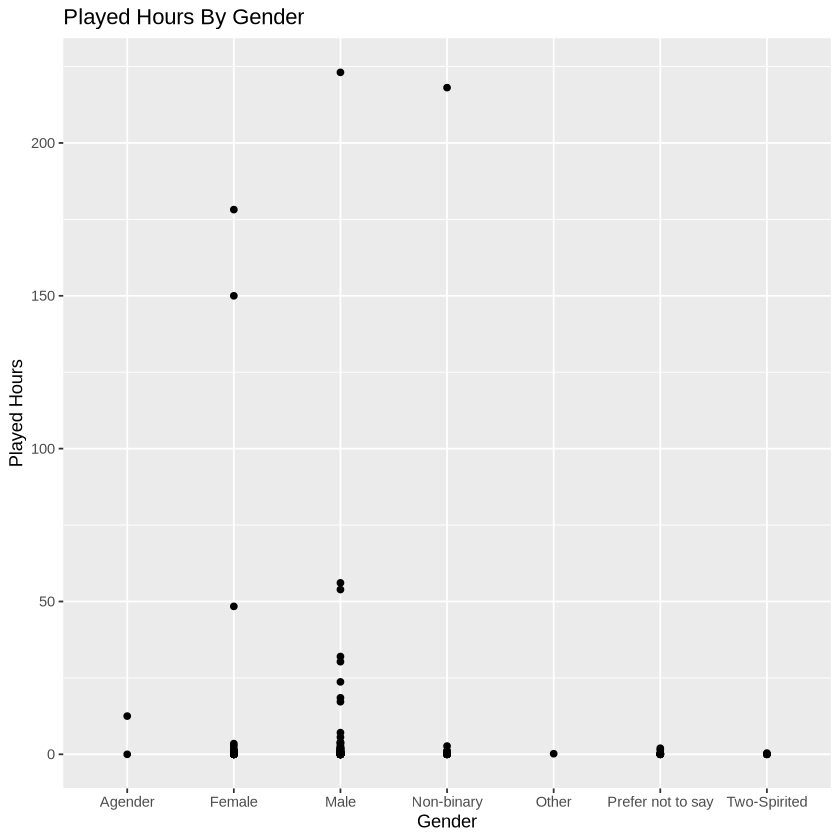

In [41]:
gender_plot <- tidy_players |>
    ggplot(aes(x = gender, y = played_hours)) +
    geom_point() +
    labs(title = "Played Hours By Gender", x = "Gender", y = "Played Hours")

gender_plot

Write explanation here. Key points: males appears to have the highest concentration of players and the highest average of played hours. Females are a close second. There is an outlier in non-binary, which probably should not be considered.

GUYS WHEN YOU EDIT THIS PLEASE CHANGE THE SCALES SO THAT THE PLOTS ARE BETTER READABLE! - Robbie

## Data Analysis & Visualisation:

Explain the method here, it's mostly in my original proposal. You can elaborate a bit more. In short, we are using linear regression.

### Preprocessing and fitting the data:

In [49]:
tidy_players_clean <- tidy_players
tidy_players_clean$experience <- as.factor(tidy_players_clean$experience)
tidy_players_clean$gender <- as.factor(tidy_players_clean$gender)

set.seed(1000)

players_split <- initial_split(tidy_players_clean, prop = 0.70, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

players_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ experience + Age + gender, data = players_train)

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_train)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)       experienceBeginner        experienceRegular  
                23.6626                  -5.9455                  12.5299  
      experienceVeteran            experiencePro                      Age  
                -9.9988                  -5.8174                  -0.3155  
           genderFemale               genderMale         genderNon-binary  
                -5.3258                 -10.8989                   5.3143  
genderPrefer not to say       genderTwo-Spirited  
               -15.4742                 -18.0994  


Coefficients indicate influence of each variable. For example, the coefficient for "Beginner" is -5.9455, meaning that, holding other factors constant, being a "Beginner" experience level would result in a decrease of about 5.95 hours of play time compared to the reference level (which is likely "Amateur" since it's missing here). Please elaborate more on this explanation.

In [50]:
players_test_results <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = played_hours, estimate = .pred)

players_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.05227247
rsq,standard,0.07013036
mae,standard,11.43264754


Explain RMSE and the other metrics here.

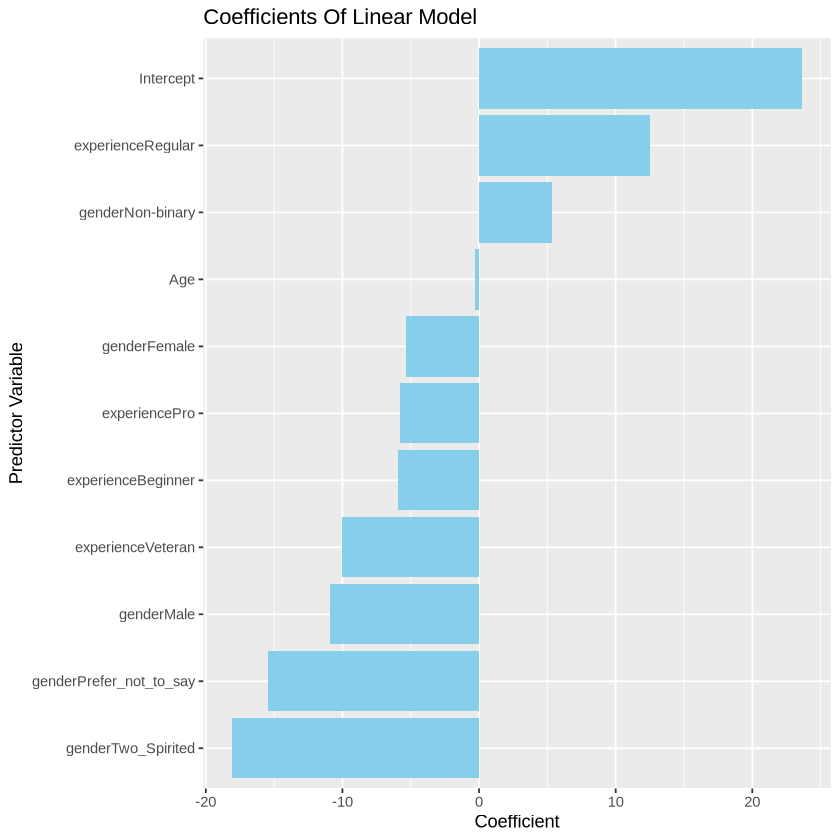

In [62]:
coef_data <- data.frame(
    variable = c("Intercept", "experienceBeginner", "experienceRegular", "experienceVeteran",
               "experiencePro", "Age", "genderFemale", "genderMale", "genderNon-binary",
               "genderPrefer_not_to_say", "genderTwo_Spirited"),
    coefficient = c(23.6626, -5.9455, 12.5299, -9.9988, -5.8174, -0.3155, -5.3258, -10.8989, 5.3143, -15.4742, -18.0994))

coef_plot <- coef_data |>
    ggplot(aes(x = reorder(variable, coefficient), y = coefficient)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    coord_flip() + 
    labs(title = "Coefficients Of Linear Model", x = "Predictor Variable", y = "Coefficient")

coef_plot

Okay this is our main visualisation, it tells us which groups are more likely to contribute. We can see that age doesn't really have that big of an influence, and that regular players contribute the most data. This doesn't account for outliers though, so we would need to fix that (especially in males/females).

***

## **Discussions**

***

## **References**